# Phoenix 2014 Dataset

In [1]:
import os
from slr.datasets.Phoenix2014Dataset import Phoenix2014Dataset

In [2]:
ds = Phoenix2014Dataset(dataset_dir='/new_home/xzj23/workspace/SLR/data/phoenix2014', mode='train')

In [3]:
x, y, info = ds.__getitem__(55)

In [4]:
x.shape

torch.Size([181, 3, 260, 210])

In [5]:
print(y)

['WIE', 'AUSSEHEN', 'SIE', 'KOENNEN', 'MACHEN', 'ANSCHAUEN', 'Z', 'D', 'E', 'TEXT', 'ODER', 'KOENNEN', 'INTERNET', 'SIE', 'SCHAUEN', 'JETZT', 'SCHOEN', 'ABEND', 'poss-EUCH', '__OFF__']


In [6]:
info

folder         01February_2011_Tuesday_heute_default-13/1/*.png
signer                                                 Signer08
annotation    WIE AUSSEHEN SIE KOENNEN MACHEN ANSCHAUEN Z D ...
Name: 01February_2011_Tuesday_heute_default-13, dtype: object

# Data Module

In [5]:
from slr.datasets.Phoenix2014DataModule import Phoenix2014DataModule
from torchvision.transforms import RandomCrop, CenterCrop, RandomHorizontalFlip, Compose, Resize
from slr.datasets.transforms import ToTensor, TemporalRescale
from slr.datasets.tknzs.simple_tokenizer import SimpleTokenizer

In [6]:
transform = Compose(
    [ToTensor(), Resize((256, 256)), RandomCrop(224), TemporalRescale(0.2)]
)  #, RandomHorizontalFlip(), TemporalRescale(scale=2)])
tokenizer = SimpleTokenizer(vocab_file='/new_home/xzj23/workspace/SLR/slrt/datasets/vocabs/phoenix2014_gloss_vocab.txt')

dm = Phoenix2014DataModule(dataset_dir='/new_home/xzj23/workspace/SLR/data/phoenix2014', batch_size=2, num_workers=10,
                           transform=transform, tokenizer=tokenizer)

In [7]:
dm.setup(stage='fit')
dl = dm.train_dataloader()

In [8]:
for x, y, x_lgt, y_lgt, info in dl:
    print(x.shape)

torch.Size([2, 132, 3, 224, 224])
torch.Size([2, 136, 3, 224, 224])
torch.Size([2, 136, 3, 224, 224])
torch.Size([2, 148, 3, 224, 224])
torch.Size([2, 156, 3, 224, 224])
torch.Size([2, 244, 3, 224, 224])
torch.Size([2, 224, 3, 224, 224])
torch.Size([2, 224, 3, 224, 224])
torch.Size([2, 224, 3, 224, 224])
torch.Size([2, 104, 3, 224, 224])
torch.Size([2, 168, 3, 224, 224])
torch.Size([2, 196, 3, 224, 224])
torch.Size([2, 168, 3, 224, 224])
torch.Size([2, 100, 3, 224, 224])
torch.Size([2, 220, 3, 224, 224])
torch.Size([2, 176, 3, 224, 224])
torch.Size([2, 148, 3, 224, 224])
torch.Size([2, 204, 3, 224, 224])
torch.Size([2, 140, 3, 224, 224])
torch.Size([2, 244, 3, 224, 224])
torch.Size([2, 152, 3, 224, 224])
torch.Size([2, 188, 3, 224, 224])


KeyboardInterrupt: 

In [11]:
x, y, x_lgt, y_lgt, info = next(iter(dl))

In [12]:
x.shape

torch.Size([2, 223, 3, 224, 224])

In [13]:
x[1, 55, 2, 10, 10]

tensor(215.2344)

In [14]:
x_lgt

[175, 211]

In [15]:
y

tensor([[1298,  719,  304,  176, 1187,  753,   23,  120, 1087, 1118, 1281, 1195,
          325, 1187,  372, 1205, 1203, 1299],
        [1298, 1250,  417,  616,   20,  372, 1281,  253,  372,  719,  876,  603,
          894,  372,  304,  203,  142, 1299]])

In [16]:
y_lgt

[18, 18]

In [17]:
print(tokenizer.decode(y[0]))

['<SOS>', 'NORD', 'FLUSS', 'DANN', 'ZWANZIG', 'OST', 'AEHNLICH', 'BESONDERS', 'WARM', 'WEST', 'loc-WEST', 'ZWEIZWANZIG', 'FUENF', 'ZWANZIG', 'GRAD', '__PU__', '__OFF__', '<EOS>']


In [18]:
print(tokenizer.decode(y[1]))

['<SOS>', 'loc-OST', 'HEUTE', 'NACHT', 'ACHTZEHN', 'GRAD', 'loc-WEST', 'ELF', 'GRAD', 'NORD', 'SEE', 'MORGEN', 'SIEBZEHN', 'GRAD', 'FLUSS', 'DOCH', 'BLEIBEN', '<EOS>']


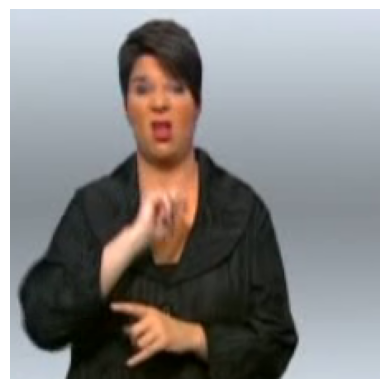

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = x[0, 55].numpy().transpose(1, 2, 0)
image = image.astype(np.uint8)
# 在 Jupyter Notebook 中显示图片
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()
